<a href="https://colab.research.google.com/github/heitor-eng/H_Data_Science/blob/master/RSI_Estoc%C3%A1stico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stochastic RSI and Python
In this project, you will find the way to build the Stochastic RSI index through the python language and to use it in your analysis, this work was inspired by [Computer Science](https://www.youtube.com/watch?v=JGB9jm8OWFs&t=757s).

### What is the Stoch RSI?
The Stoch RSI is used to determine whether an asset is overbought or oversold and also to identify current market trends. Sotch RSI is derived from the RELATIVE STRENGTH INDEX (Relative Force Index, RSI), and as it derives from a "parent" indicator, the Stoch RSI parameter is used in the analyzes as a support for the other indicators, thus functioning as a type of oscillator that floats above and below a centerline.


Vale S.A. (VALE)
NYSE - Nasdaq Price in real time, in USD.
14,78+0,22 (+1,48%)


<p align=center>
<img src = "https://github.com/heitor-eng/H_Data_Science/blob/master/Imagens/logo-vale-escudo-1024.png?raw=true" width = "50%">
</p>



.


###This program uses the Stochastic Relative Strength Index or (stoch RSI) indicator and python to determine if an asset is overbought or oversold.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [ ]:
#load the data
from google.colab import files
files.upload()

In [3]:
# Read the file
df = pd.read_csv('VALE.csv',index_col="Date",parse_dates=True)

# Show the data
print('The number of rows: ',df.shape[0])
print("And the columns are: ", df.shape[1])

# The head of the dataset
df.head()

The number of rows:  251
And the columns are:  6


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-12,11.27,11.30,11.18,11.22,9.523973,14906300
2020-10-13,11.01,11.29,10.97,11.21,9.515485,22460500
2020-10-14,11.22,11.36,11.21,11.34,9.625834,28812000
2020-10-15,11.13,11.28,11.07,11.18,9.490020,16506000
2020-10-16,11.22,11.24,11.09,11.09,9.413624,11870300


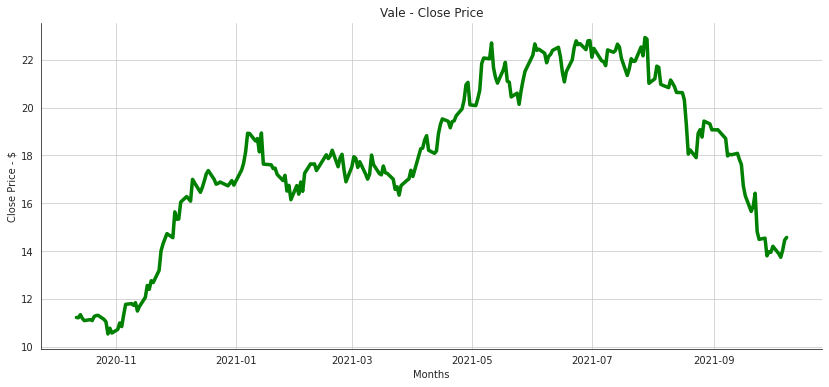

In [4]:

# Plot the Close price column
plt.figure(figsize=(14,6))
plt.title("Vale - Close Price")
plt.plot(df.index, df.Close, lw = '3.5', c = 'green')
plt.grid()
plt.xlabel('Months')
plt.ylabel('Close Price - $')
sns.despine(left = False, bottom = False)

plt.show()


## **Exponential Moving Average:**
* The EMA is a moving average that places a greater weight and significance on the most recent data points.
* Like all moving averages, this technical indicator is used to produce buy and sell signals based on crossovers and divergences from the historical average.
* Traders often use several different EMA lengths, such as 10-day, 50-day, and 200-day moving averages.


---
###**Equation:**

$$EMA_{today} = (Value_{today}(\frac{Smoothing}{1+Days})) + (Value_{yesterday}(1-(\frac{Smoothing}{1+Days})))$$




**Where:**

> **EMA** = Exponential Moving Average

While there are many possible choices for the smoothing factor, the most common choice is:

> **Smoothing** = 2

That gives the most recent observation more weight. If the smoothing factor is increased, more recent observations have more influence on the EMA.

At the Pandas documetantion you will find the [.ewm](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html) function, which Provide exponential weighted (EW) functions.

To know more about Exponential Moving Average you can find the website [Investopedia](https://www.investopedia.com/terms/e/ema.asp).


In [5]:
# create a Exponencial Moving Average indicator function
def EMA(data, period = 20, column ='Close'):
  return data[column].ewm(span= period, adjust = False).mean()

Moving forward in the example, now it is time to build the function which will give the **Stochastic Relative Strength Index**.

For more information about how this index works, you can access this web page [Binance](https://academy.binance.com/pt/articles/stochastic-rsi-explained) the page is written in Portuguese.



---



In [6]:
# create a function to calculate the Stochastic Relative Strength Index
def StochRSI(data, period = 14, column = 'Close'):
  delta = data[column].diff(1)
  delta = delta.dropna()
  up = delta.copy()
  down = delta.copy()
  up[up<0] = 0
  down[down>0] = 0
  data['up'] = up
  data['down'] = down
  AVG_Gain = EMA(data,period,column = 'up')
  AVG_Loss = abs( EMA(data, period,column = 'down') )
  RS = AVG_Gain/AVG_Loss
  RSI = 100.0 - (100.0/(1.0+RS))

  stockrsi = ((RSI - RSI.rolling(period).min())/(RSI.rolling(period).max()-RSI.rolling(period).min()))

  return stockrsi 


In [7]:
# store the stochastic RSI data in a new column
df['StochRSI'] = StochRSI(df)

In [8]:
# Show the data
print('The number of rows: ',df.shape[0])
print("And the columns are: ", df.shape[1])

# Show the dataframe
df.head()

The number of rows:  251
And the columns are:  9


,Open,High,Low,Close,Adj Close,Volume,up,down,StochRSI
Date,,,,,,,,,
2020-10-12,11.27,11.30,11.18,11.22,9.523973,14906300,NaN,NaN,NaN
2020-10-13,11.01,11.29,10.97,11.21,9.515485,22460500,0.00,-0.01,NaN
2020-10-14,11.22,11.36,11.21,11.34,9.625834,28812000,0.13,0.00,NaN
2020-10-15,11.13,11.28,11.07,11.18,9.490020,16506000,0.00,-0.16,NaN
2020-10-16,11.22,11.24,11.09,11.09,9.413624,11870300,0.00,-0.09,NaN


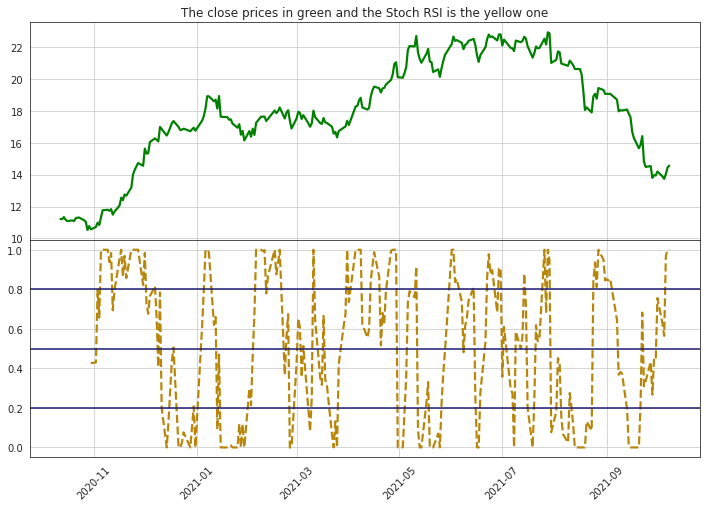

In [10]:
# Plot the data
# Create a figure and a set of subplots
fig, (ax1,ax2) = plt.subplots(nrows=2, sharex = True, figsize =(12,8))

# Remove the vertical gap between the subplots
plt.subplots_adjust(hspace=.0)

# set grid lines
ax1.grid()
ax2.grid()

# Plot the Close price
ax1.plot(df.index,df.Close, c = 'green', lw = '2.2')
ax1.set_title("The close prices in green and the Stoch RSI is the yellow one")

# Plot the Stoch RSI 
ax2.plot(df.index, df.StochRSI, c = '#B8860B', lw = '2.2', linestyle='--')

# Plot the OverSold (0.2) and overbought (0.8)
ax2.axhline(0.20, c = '#191970')
ax2.axhline(0.50, c = '#191970')
ax2.axhline(0.8, c ='#191970')

# Rotate the xticks by 45 degrees
plt.xticks(rotation = 45)

plt.show()

**How to read the graph**

The yellow line shows the behavior of **Stochastic Relative Strength Index**, and the lines in blue are the area of the regions where the assests is overbought (above 0.8) or oversold (bellow 0.2) and the line at the midle shows the possible tendency of the market.

---



### **Conclusions**

The graph shows how we can interpret the stoch RSI index about the bull market or bear market as an support for the analysis.